# 

# Investigating limits with Julia

To get started, we load the `MTH229` package so that we can make plots
and use some symbolic math:

In [1]:
using MTH229
using Plots
plotly()

------------------------------------------------------------------------

### Quick background

Read about this material here: [Investigating limits with
Julia](http://mth229.github.io/limits.html).

The expression

$$
\lim_{x \rightarrow c} f(x) = L
$$

says that the limit as $x$ goes to $c$ of $f$ is $L$.

> Intuitively, as $x$ gets “close” to $c$, $f(x)$ should be close to
> $L$.

If $f(x)$ is *continuous* at $x=c$, then $L=f(c)$. This is almost always
the case for a randomly chosen $c$ - but almost never the case for a
textbook choice of $c$. Invariably with text book examples—though not
always—we will have `f(c) = NaN` indicating the function is
indeterminate at `c`. For such cases we need to do more work to identify
if any such $L$ exists and when it does, what its value is.

In this project, we investigate limits three ways: graphically, with a
table of numbers, and analytically, developing the inituition of limits
along the way.

#### Graphical approach

The graphical approach is to plot the expression *near* $c$ and look
visually what $f(x)$ goes to as $x$ gets close to $c$.

For example, what is this limit?

$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}?
$$

Here is a graph to investigate the problem. We simply graph near $c$ and
look:


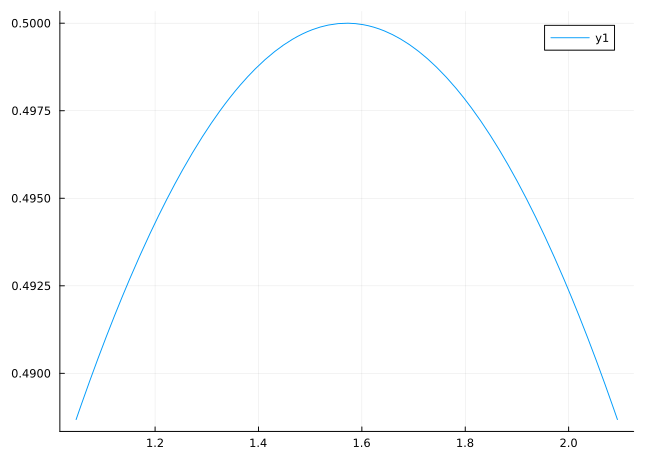

In [3]:
f(x) = (1-sin(x)) / (pi/2 - x)^2
c = pi/2
plot(f, c - pi/6, c + pi/6)

From the graph, we see clearly that as $x$ is close to $c=\pi/2$, $f(x)$
is close to $1/2$. (The fact that `f(pi/2) = NaN` will either not come
up, as `pi/2` is not among the points sampled or the `NaN` values will
not be plotted.)

## Using tables to investigate limits

Investigating a limit numerically requires us to operationalize the idea
of $x$ getting close to $c$ and $f(x)$ getting close to $L$. Here we do
this manually:

In [4]:
f(x) = sin(x)/x
f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)

(0.9983341664682815, 0.9999833334166665, 0.9999998333333416, 0.9999999983333334, 0.9999999999833332, 0.9999999999998334)

From this we see a *right* limit at 0 appears to be $1$.

We can put the above into a column, by wrapping things in square
brackets (forming a vector):

In [5]:
[f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)]

6-element Vector{Float64}:
 0.9983341664682815
 0.9999833334166665
 0.9999998333333416
 0.9999999983333334
 0.9999999999833332
 0.9999999999998334

The style of printing makes it clear, the limit here should be $L=1$.

Limits when $c\neq 0$ are similar, but require points getting close to
$c$. For example,

$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}
$$

has a limit of $1/2$. We can investigate with:

In [6]:
c = pi/2
f(x) = (1 - sin(x))/(pi/2 - x)^2
[f(c+.1), f(c+.001), f(c+.00001), f(c+.0000001), f(c+.000000001)]

5-element Vector{Float64}:
 0.49958347219742816
 0.4999999583256134
 0.5000000413636343
 0.49960036049791995
 0.0

Wait, is the limit $1/2$ or $0$? At first $1/2$ seems like the answer,
but the last number is $0$.

Here we see a limitation of tables - when numbers get too small, that
fact that they are represented in floating point becomes important. In
this case, for numbers too close to $\pi/2$ the value on the computer
for `sin(x)` is just 1 and not a number near 1. Hence the denominator
becomes $0$, and so then the expression. (Near $1$, the floating point
values are about $10^{-16}$ apart, so when two numbers are within
$10^{-16}$ of each other, they can be rounded to the same number.) So
watch out when seeing what the values of $f(x)$ get close to. Here it is
clear that the limit is heading towards $0.5$ until we get too close.

For convenience, the `lim` function from the `MTH229` package can make
the above computations easier to do. Its use follows the common pattern:
`action(function, arguments...)`. For example, the limit of $1$ is
clearly suggested below:

In [7]:
f(x) = sin(x) / x
lim(f, 0)

0.100000 0.9983341664682815
 0.010000 0 . 9 9 99833334166665
 0.001000 0 . 9 9 9 9 998333333416
 0.000100 0 . 9 9 9 9 9 9 9983333334
 0.000010 0 . 9 9 9 9 9 9 9 9 99833332
 0.000001 0 . 9 9 9 9 9 9 9 9 9 9 998334
 ⋮ ⋮
 c L?
 ⋮ ⋮
-0.000001 0 . 9 9 9 9 9 9 9 9 9 9 998334
-0.000010 0 . 9 9 9 9 9 9 9 9 99833332
-0.000100 0 . 9 9 9 9 9 9 9983333334
-0.001000 0 . 9 9 9 9 998333333416
-0.010000 0 . 9 9 99833334166665
-0.100000 0.9983341664682815

The limit of $1/2$ is suggested by the following

In [8]:
f(x) = (1 - sin(x))/(pi/2 - x)^2
lim(f, pi/2)

1.670796 0.49958347219742816
1.580796 0 . 4 9 9 9958333473655
1.571796 0 . 4 9 9 9 9 99583256134
1.570896 0 . 4 9 9 9 9 9 9 969613747
1.570806 0 . 5000000413636343
1.570797 0 . 5 0 0 0 444503734445
 ⋮ ⋮
 c L?
 ⋮ ⋮
1.570795 0 . 5 0 0 0 444503734445
1.570786 0 . 5000000413636343
1.570696 0 . 4 9 9 9 9 9 9 969613747
1.569796 0 . 4 9 9 9 9 99583256134
1.560796 0 . 4 9 9 9958333473655
1.470796 0.49958347219742816

The above will generate values just bigger than `pi/2` and just smaller
than `pi/2` which are helpful to investigate the limit from *both*
sides. For just a *left* limit, pass in `dir="-"`, as with

In [9]:
lim(f, pi/2, dir="-")

c L?
 ⋮ ⋮
1.570795 0 . 5 0 0 0 444503734445
1.570786 0 . 5000000413636343
1.570696 0 . 4 9 9 9 9 9 9 969613747
1.569796 0 . 4 9 9 9 9 99583256134
1.560796 0 . 4 9 9 9958333473655
1.470796 0.49958347219742816

Similarly, pass in `dir="+"` to get just the right limit.

## Symbolic limits

The add-on package `SymPy` can be used to analytically compute the limit
of a symbolic expression. The package is loaded when `MTH229` is.
`SymPy` provides the `limit` function. A sample usage is shown below:

In [10]:
f(x) = sin(x)/x
@syms x
limit(f(x), x => 0)

The new command, `@syms x`, creates a symbolic variable named `x`. This
makes `f(x)` a symbolic expression

In [11]:
f(x)

To find the limit of an expression, `ex`, as a symbolic variable, `x`,
goes towards some value `c`, `0` in the above example, is performed by
the command `limit(ex, x => c)`.

SymPy finds the *right limit by default*. A left limit can be asked for
with the additional argument `dir="-"`. Passing `dir="+-"` to SymPy asks
for both the left and right limit and a test for their equality (e.g.,
the limit).

------------------------------------------------------------------------

In [12]:
# Your commands go here
